<center><font size=8>Flight Price Prediction Case Study</font></center>

## Context
 - The dataset consists of about one year of information about various flights and their respective prices.
 - The flight details have information related to flight timings, source and destination details, route details, stops in between, etc.

## Problem Statement
 - The objective of this project is to predict the price of a flight with a set of relevant flight details provided


## Data Dictionary

- Airline - Company that provides air transport services for traveling passengers. (Independent Variable)
- Source  - From where the flight is takes off.(Independent Variable)
- Destination - To where the flight is going.(Independent Variable)
- Route   - What is the route of each flight.(Independent Variable)
- Dep Time - Departure Time of the flight.(Independent Variable)
- Arrival Time - Arrival Time of the flight.(Independent Variable)
- Duration - Total duration of the flight.(Independent Variable)
- Total Stops - Number of stops between source and destination.(Independent Variable)
- Additional info - Additional information about the flight is given.(Independent Variable)
- Price - Price of each flight.(Dependent Variable)

### **Importing the necessary libraries**

In [58]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to standardize the data
from sklearn.preprocessing import StandardScaler

# library to import different metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score

# Importing tensorflow library
import tensorflow as tf

# Importing different functions to build models
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

# Importing Batch Normalization
from tensorflow.keras.layers import BatchNormalization

# Importing backend
from tensorflow.keras import backend

# Importing optimizers
from tensorflow.keras.optimizers import Adam,RMSprop

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

Reading the Dataset

In [3]:
data=pd.read_excel("Data.xlsx")

Creating a copy of the dataset to avoid any changes to the original dataset

In [4]:
df=data.copy()

Viewing the dataset

In [5]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Print the first five rows of the data

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Print the last five rows of the data

In [7]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10681,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [8]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [9]:
# Checking the shape of the data
df.shape

(10682, 11)

In [10]:
# finding the null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
# Checking where the null value present
df[df["Route"].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9038,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


* Those 2 values belong to a single row so we can drop that row

In [12]:
# drop the null values
df.dropna(inplace=True)

In [13]:
# resetting the index
df.reset_index(drop=True, inplace=True)

In [14]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
# Checking the dtypes of the variables in the data
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

* The dtypes of 'Date_of_Journey','Dep_Time',and 'Arrival_Time' is in object, so firstly converting it into datetime dtype 

In [16]:
# Creating a function to convert those columns into datetime dtype
def To_Datetime(data,column):
    data[column]=pd.to_datetime(data[column])
    return data[column]

In [17]:
# convert the columns we want into datetime
To_Datetime(df,"Date_of_Journey")
To_Datetime(df,"Dep_Time")
To_Datetime(df,"Arrival_Time")

0       2025-03-22 01:10:00
1       2025-03-20 13:15:00
2       2025-06-10 04:25:00
3       2025-03-20 23:30:00
4       2025-03-20 21:35:00
                ...        
10676   2025-03-20 22:25:00
10677   2025-03-20 23:20:00
10678   2025-03-20 11:20:00
10679   2025-03-20 14:10:00
10680   2025-03-20 19:15:00
Name: Arrival_Time, Length: 10681, dtype: datetime64[ns]

* We can extract day and month from Date_of_journey and store it in two other columns.

In [18]:
# creating new columns
df["Day_of_Journey"]=df["Date_of_Journey"].dt.day
df["Month_of_Journey"]=df["Date_of_Journey"].dt.month

* Now using Dep_Time and Arrival_Time we can extract hour and minute from both the variables

In [19]:
# Extracting hour and minute values from Dep_time variable
df["Dep_hour"]=df["Dep_Time"].dt.hour
df["Dep_minute"]=df["Dep_Time"].dt.minute

# Extracting hour and minute values from Dep_time variable
df["Arrival_hour"]=df["Arrival_Time"].dt.hour
df["Arrival_minute"]=df["Arrival_Time"].dt.minute


* After extacting required data from Date_of_Journey, Dep_Time, and Arrival_Time we can drop these variables 

In [20]:
df.drop(["Date_of_Journey","Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [21]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10677,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10678,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10679,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


* Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [22]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [23]:
df["Duration_hours"]=duration_hours
df["Duration_minute"]=duration_mins

In [24]:
# Dropping Duration variable as we have extracted both hours and mins from it
df.drop(["Duration"], axis=1, inplace=True)

In [25]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [26]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Day_of_Journey       int64
Month_of_Journey     int64
Dep_hour             int64
Dep_minute           int64
Arrival_hour         int64
Arrival_minute       int64
Duration_hours       int64
Duration_minute      int64
dtype: object

In [27]:
cat_columns= df.select_dtypes(include="object").columns
for i in cat_columns:
    print(df[i].value_counts())
    print("*"*20)

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: Airline, dtype: int64
********************
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64
********************
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64
********************
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → RPR → HYD

In [28]:
# replacing New Delhi with Delhi
df["Destination"]=df["Destination"].replace("New Delhi", "Delhi")

### Exploratory Data Analysis

#### Univariate Analysis

In [29]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data)
    order = data[feature].value_counts().index[:n] if n else data[feature].value_counts().index

    plt.figure(figsize=(len(order) + 1, 7))
    # create the barplot
    ax = sns.countplot(data=data, x=feature, order=order, hue=feature, legend=False)
    # rotate the x-axis labels
    plt.xticks(rotation=90, fontsize=15)
    # add labels to the barplot
    for p in ax.patches:
        label = f'{100 * p.get_height() / total:.1f}%' if perc else p.get_height()
        ax.annotate(label, (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', fontsize=12)

    plt.show()

### `Airline`

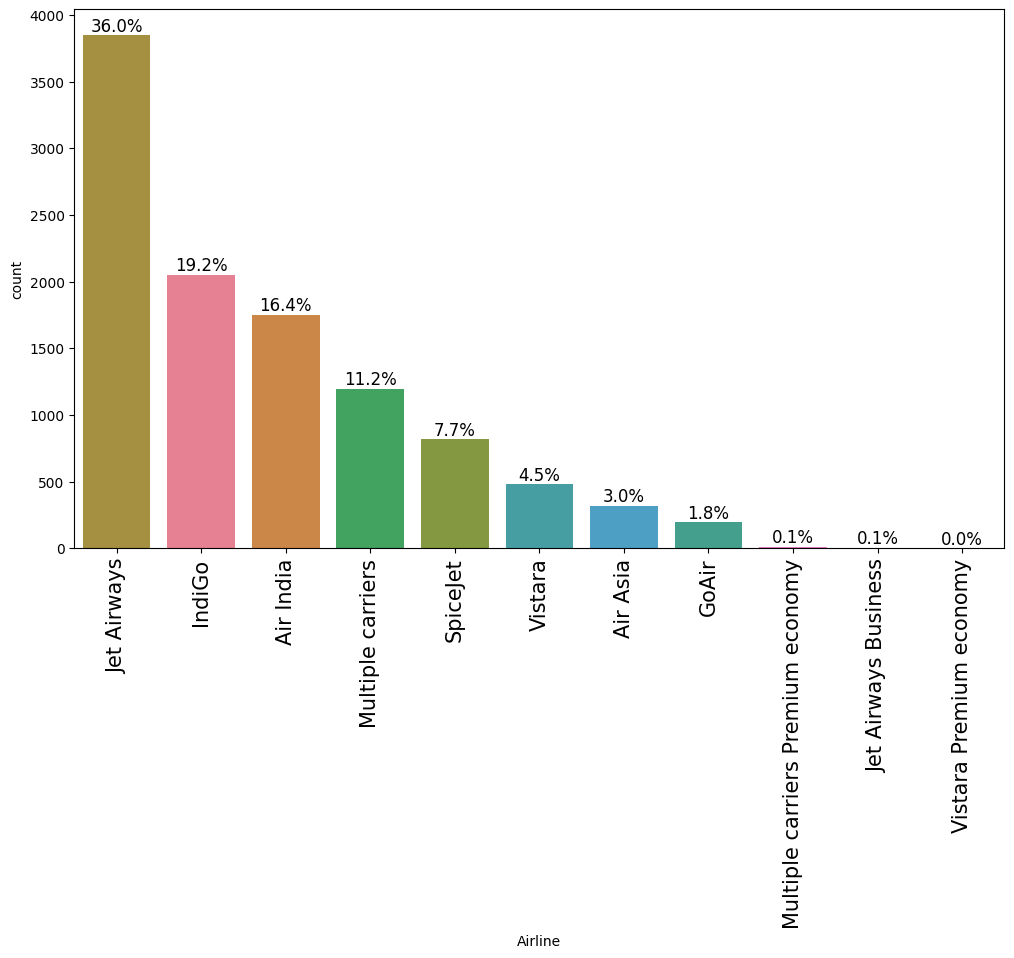

In [30]:
labeled_barplot(df,"Airline",perc=True)

* From the above bar plot we can see most of them have opted Jet Airways as their Airline for transportation

### `Total Stops`

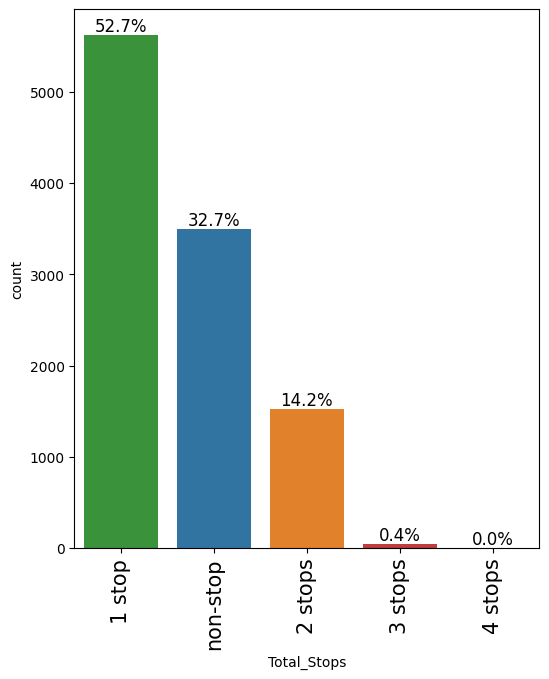

In [31]:
labeled_barplot(df,"Total_Stops",perc=True)

* Most of the airlines runs with maximum of single stop during the journey

### `Source`

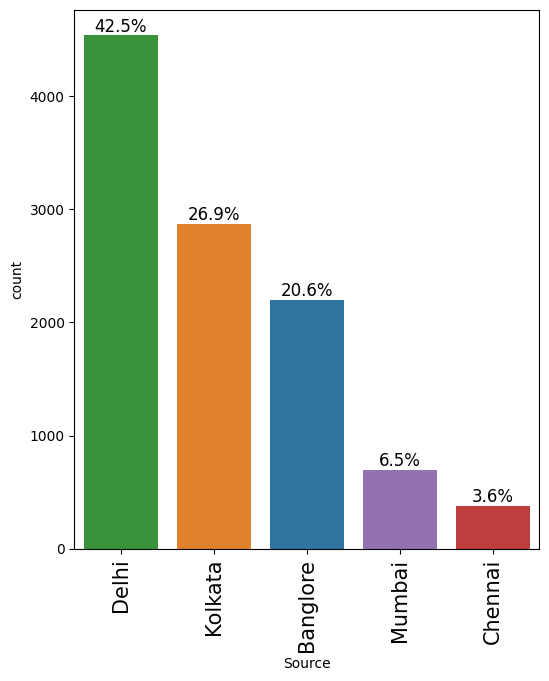

In [32]:
labeled_barplot(df,"Source",perc=True)

* Most of flights are departing from Delhi followed by Kolkata

### `Destination`

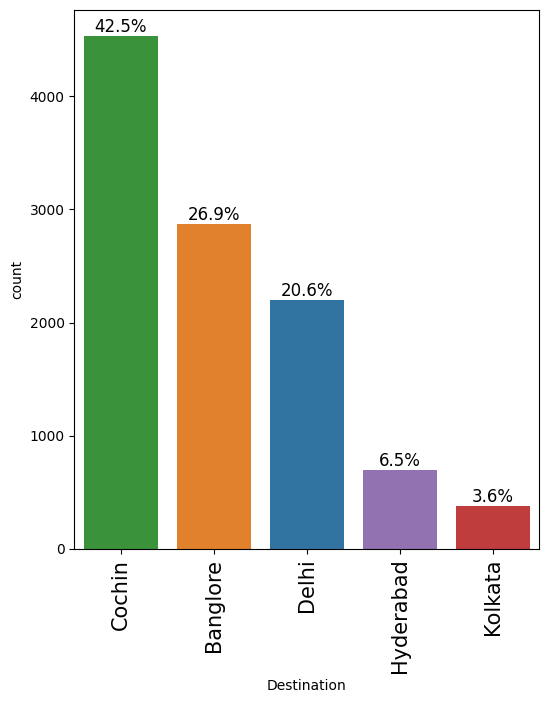

In [33]:
labeled_barplot(df,"Destination",perc=True)

* From the above plot we can observe most of the filghts are going to Cochin 

### `Additional_Info`

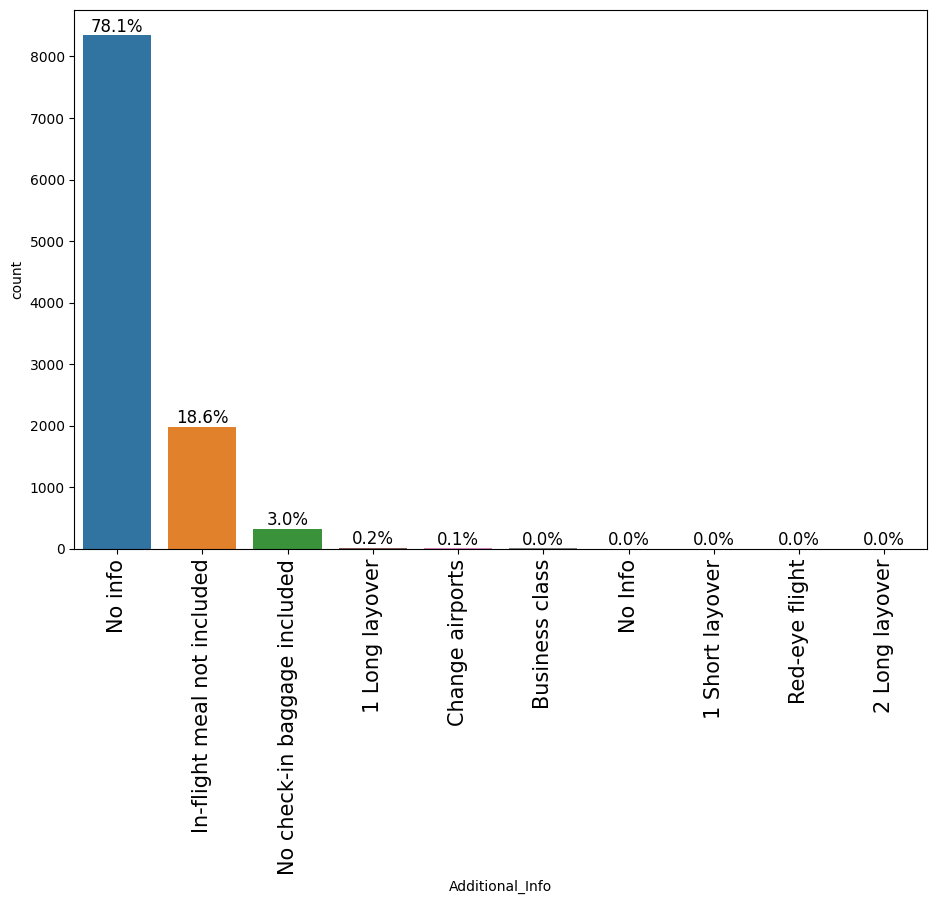

In [34]:
labeled_barplot(df,"Additional_Info",perc=True)

* As most of the Additional_Info (80%) variable contains No_info so we can drop this from the dataset

In [35]:
data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → RPR → HYD → BLR       1
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → BBI → HYD             1
Name: Route, Length: 127, dtype: int64

* Route and Total_Stops are related to each other so we can drop Route variable. 
* Since there is not much information from the Additional_info variable, we will drop the Additional_info variable.

In [36]:
df.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [37]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minute
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,13302,3,1,16,50,21,35,4,45


In [38]:
df["Total_Stops"].value_counts()

1 stop      5624
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [39]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
df["Total_Stops"]=df["Total_Stops"].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

### Bivariate analysis

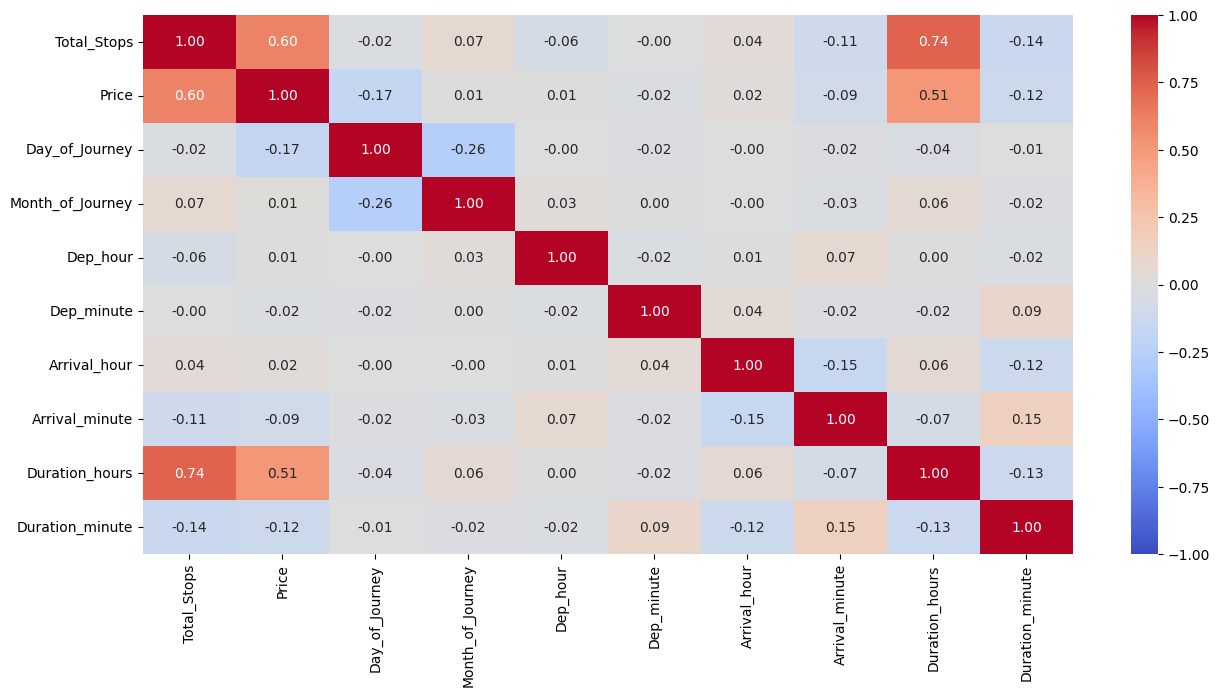

In [40]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
plt.show()

* Duration hours and Total stops are highly correlated to target column.
* Total stops and Duration hours are highly positive correlated to target column.

### `Airline` vs `Price`

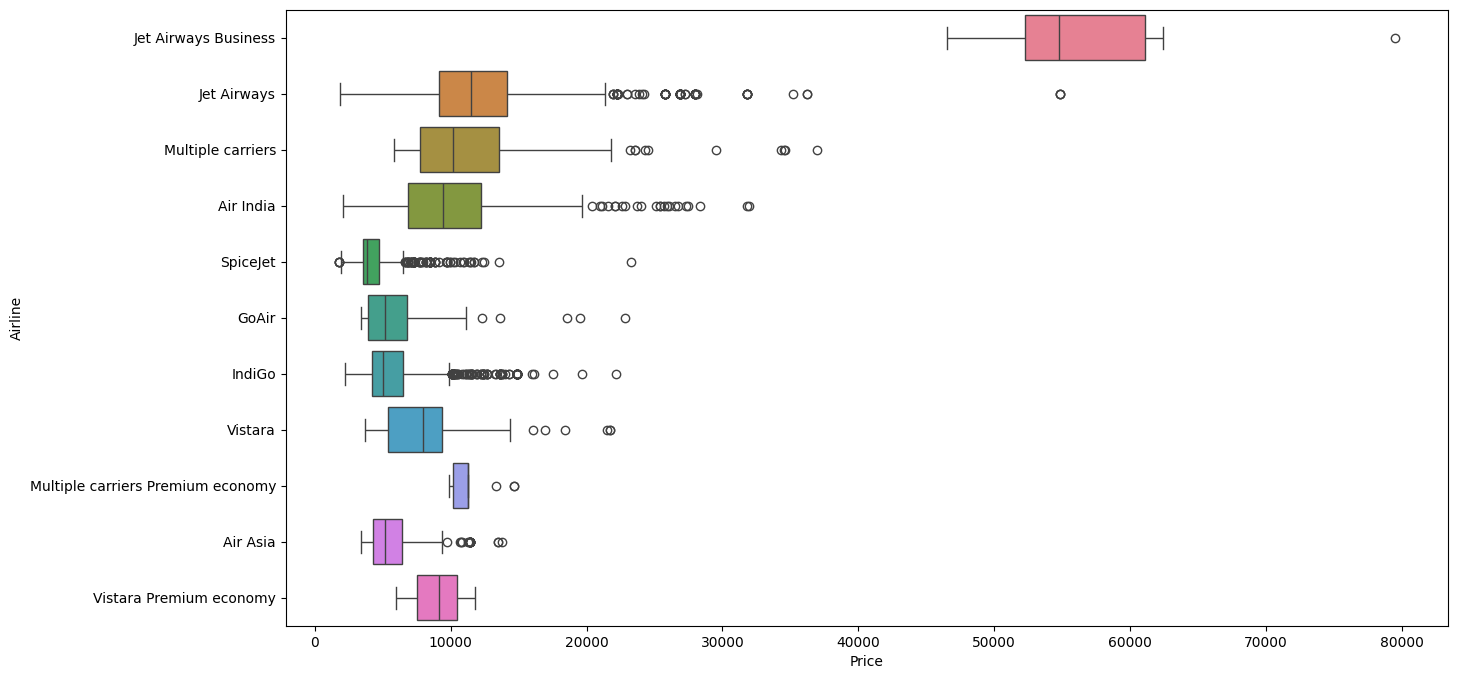

In [41]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Price',y='Airline',data=df.sort_values(by='Price',ascending=False),hue='Airline')
plt.show()

- Jet Airways Business is charging high price when comparing with other Airlines 
- Apart from the Jet Airways Business Airline almost all are having similar median.

In [42]:
Jet_Airways_business_prices=df[df["Airline"]=="Jet Airways Business"]
Jet_Airways_business_prices

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minute
657,Jet Airways Business,Banglore,Delhi,1,52229,3,1,5,45,10,45,5,0
2923,Jet Airways Business,Banglore,Delhi,1,79512,3,1,5,45,11,25,5,40
5371,Jet Airways Business,Banglore,Delhi,1,62427,3,1,5,45,12,25,6,40
7350,Jet Airways Business,Delhi,Cochin,2,46490,3,3,20,5,4,25,8,20
9713,Jet Airways Business,Delhi,Cochin,2,52285,3,6,20,5,4,25,8,20
10362,Jet Airways Business,Banglore,Delhi,1,57209,3,1,9,45,14,25,4,40


* We can see the price of the Jet Airways Business Airline having an average price of 50 thousand Rupees 

### `Total Stops` vs `Price`

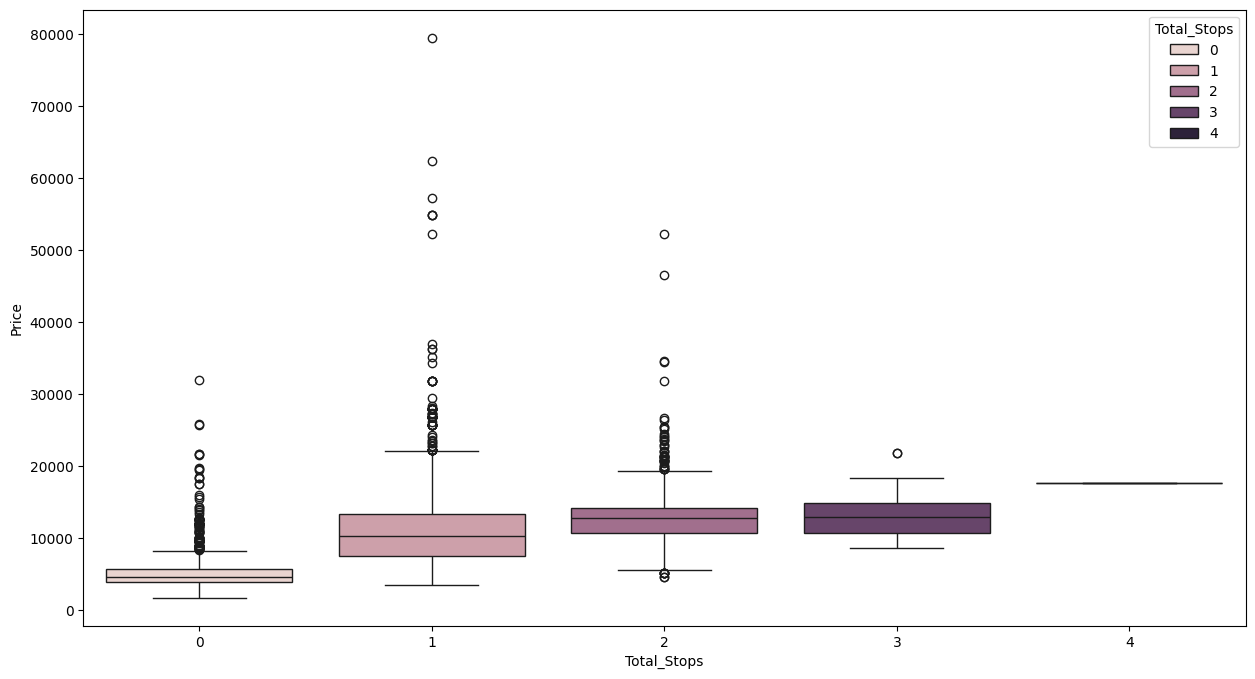

In [43]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values(by='Price',ascending=False),hue='Total_Stops')
plt.show()

* Airline with 2 and 3 stops travel prices are slightly higher than others

## Data Preparation for Modeling

In [102]:
## Storing required categorical variables in cat_dat to apply dummification 
cat_data = ["Airline",'Source','Destination']

In [103]:
# Splitting Independent and dependent variable in X and Y respectively
X=df.drop("Price",axis=1)
y=df[["Price"]]

print(X.shape,y.shape,type(X),type(y))

(10681, 12) (10681, 1) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [104]:
# Splitting the dataset into the Training and Testing set
X_temp,X_test,y_temp,y_test=train_test_split(X,y,test_size=0.1,random_state=42,shuffle=True)

In [105]:
print(X_temp.shape,X_test.shape,y_temp.shape,y_test.shape)

(9612, 12) (1069, 12) (9612, 1) (1069, 1)


In [106]:
# Splitting the dataset into the Training and validation set
X_train,X_val,y_train,y_val=train_test_split(X_temp,y_temp,test_size=0.2,random_state=42,shuffle=True)

In [107]:
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(7689, 12) (1923, 12) (7689, 1) (1923, 1)


**Normalizing the Hours and minute columns**

In [108]:
# Scaling
scaler_X=StandardScaler()
X_train[['Dep_hour', 'Dep_minute','Arrival_hour', 'Arrival_minute', 'Duration_hours', 'Duration_minute']]=scaler_X.fit_transform(X_train[['Dep_hour', 'Dep_minute','Arrival_hour', 'Arrival_minute', 'Duration_hours', 'Duration_minute']])
X_val[['Dep_hour', 'Dep_minute','Arrival_hour', 'Arrival_minute', 'Duration_hours', 'Duration_minute']]=scaler_X.transform(X_val[['Dep_hour', 'Dep_minute','Arrival_hour', 'Arrival_minute', 'Duration_hours', 'Duration_minute']])
X_test[['Dep_hour', 'Dep_minute','Arrival_hour', 'Arrival_minute', 'Duration_hours', 'Duration_minute']]=scaler_X.transform(X_test[['Dep_hour', 'Dep_minute','Arrival_hour', 'Arrival_minute', 'Duration_hours', 'Duration_minute']])

In [109]:
# Scaling the Target variable (contionous variable) to reduce time complexity
scaler_y=StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1,1))  
y_val = scaler_y.transform(y_val.values.reshape(-1,1))
y_test = scaler_y.transform(y_test.values.reshape(-1,1))

**Categorical Encoding**

In [110]:
# Using pd.get dummies to encode the categorical columns in the data
X_train=pd.get_dummies(X_train,columns=cat_data,drop_first=True)
X_val=pd.get_dummies(X_val,columns=cat_data,drop_first=True)
X_test=pd.get_dummies(X_test,columns=cat_data,drop_first=True)

In [111]:
# Checking the shape
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(7689, 27)
(7689, 1)
(1923, 27)
(1923, 1)
(1069, 26)
(1069, 1)


* Since we have different number of columns in X_train and X_test, we will use align function to create dummy variables with all values of zero's in it. 

In [112]:
# Aligning the columns
X_train,X_test = X_train.align(X_test,join='outer',axis=1,fill_value=0)
X_train,X_val = X_train.align(X_val,join='outer',axis=1,fill_value=0)

In [113]:
# Checking the shape
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(7689, 27)
(7689, 1)
(1923, 27)
(1923, 1)
(1069, 27)
(1069, 1)


# Model Building

In [116]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

#### Model-1

In [121]:
# Initializing the model
model1 = Sequential([
    Dense(64, activation='relu',kernel_initializer='he_uniform', input_dim=X_train.shape[1]),# Adding input layer with 64 neurons, relu as activation function and he_uniform as weight initializer
    Dense(32, activation='relu',kernel_initializer='he_uniform'),# Adding input layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
    Dense(16, activation='relu',kernel_initializer='he_uniform'),# Adding input layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
    Dense(1, activation='linear')]) # Adding the output layer with one neuron and linear as activation



In [122]:
# Model summary
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
# Initializing the Optimizer
optimizer=RMSprop(learning_rate=0.001)
# Compiling the model with 'mse' as loss function and metrics
model1.compile(loss="mse",optimizer=optimizer,metrics=["mae"])
# Fitting the model on train and validation with 50 epochs
history=model1.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7933 - mae: 0.6561 - val_loss: 0.4850 - val_mae: 0.4552
Epoch 2/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4302 - mae: 0.4740 - val_loss: 0.4230 - val_mae: 0.4264
Epoch 3/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3700 - mae: 0.4412 - val_loss: 0.3833 - val_mae: 0.4108
Epoch 4/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3407 - mae: 0.4228 - val_loss: 0.3550 - val_mae: 0.3984
Epoch 5/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3186 - mae: 0.4065 - val_loss: 0.3375 - val_mae: 0.3893
Epoch 6/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3013 - mae: 0.3937 - val_loss: 0.3273 - val_mae: 0.3848
Epoch 7/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2876 - mae: 0.3848 - val_loss: 0.3137 - val_mae: 0.3787
Epoch 8/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2763 - mae: 0.3759 - val_loss: 0.3047 - val_mae: 0.3714
Epoch 9/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

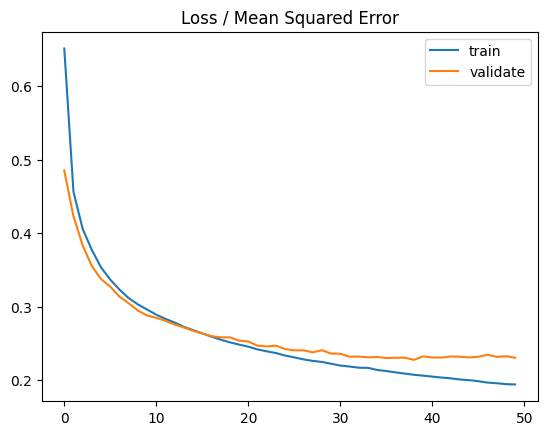

In [124]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validate')
plt.legend()
plt.show()